In [67]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = yf.download('AAPL', start='2022-01-01')
time_elapsed = (df.index[-1] - df.index[0]).days

[*********************100%***********************]  1 of 1 completed


In [69]:
total_growth = (df['Adj Close'][-1] - df['Adj Close'][0]) / df['Adj Close'][0]
num_years = time_elapsed / 365

In [70]:
returns = np.log(1 + df['Adj Close'].pct_change())

In [71]:
no_of_days = 252
mu, sigma = returns.mean(), returns.std()

In [72]:
sim_returns = np.random.normal(mu, sigma, no_of_days)

In [73]:
initial = df['Adj Close'].iloc[-1]

In [74]:
sim_prices = initial*(sim_returns+1).cumprod()

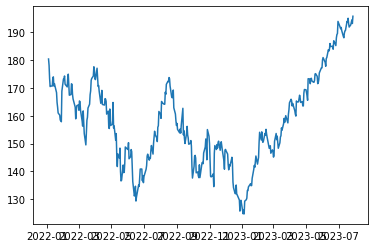

In [75]:
plt.plot(df['Adj Close'])

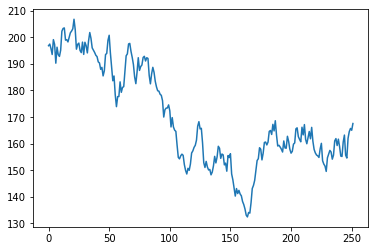

In [76]:
plt.plot(sim_prices)

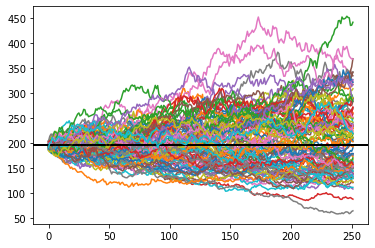

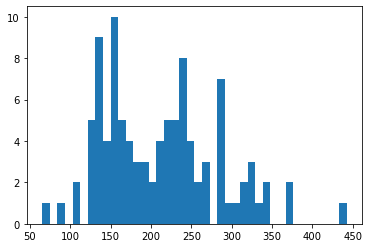

In [79]:
closing_prices = []
for i in range(100):
    sim_returns = np.random.normal(mu, sigma, no_of_days)
    sim_prices = initial*(sim_returns+1).cumprod()
    closing_prices.append(sim_prices[-1])
    plt.axhline(initial, c='k')
    plt.plot(sim_prices)
plt.show()
plt.hist(closing_prices, bins=40)
plt.show()

In [ ]:
mean_end_price = round(np.mean(closing_prices),2)